## 笑い声」を分析・検証してみる.
> https://qiita.com/mk-cover/items/e67c4f13b23edce603ea

Calculate MFCC: mel frequency cepstral coefficients from resources.

In [2]:
!pip list > requirements.txt

In [6]:
talent_list = [
    {
        "name": "アンジュ・カトリーナ",
        "path": "../data_collection/training/chat-ange.mp3",
        "color": "#C83C35",
    },
    {
        "name": "リゼ・ヘルエスタ",
        "path": "../data_collection/training/chat-lize.mp3",
        "color": "#42FFFF",
    },
    {
        "name": "戌亥とこ",
        "path": "../data_collection/training/chat-toko.mp3",
        "color": "#92F3A4",
    }
]

In [20]:
import librosa
import numpy as np
import os

sample_rate = 22050
segment_duration = 2  # seconds
mfccs = []
labels = []

for talent in talent_list:
    path = talent["path"]
    if os.path.exists(path): 
        audio, _ = librosa.load(path, sr=sample_rate, mono=True)
        total_duration = len(audio) / sample_rate
        num_segments = int(total_duration)

        for i in range(num_segments):
            start_sample = int(i * sample_rate)
            end_sample = int((i + segment_duration) * sample_rate)
            segment = audio[start_sample:end_sample]

            # Compute the MFCC for the segment
            mfcc = np.mean(librosa.feature.mfcc(y=segment, sr=sample_rate, n_mfcc=13)[1:], axis=1)
            mfccs.append(mfcc)
            labels.append(talent["name"])

In [16]:
from sklearn.datasets import load_digits
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [21]:
train_mfccs, test_mfccs, train_labels, test_labels = train_test_split(mfccs, labels)

estimator = SVC(C = 1.0, kernel = 'rbf', gamma = 0.01)
classifier = OneVsRestClassifier(estimator)
classifier.fit(train_mfccs, train_labels)
pred_labels = classifier.predict(test_mfccs)

In [22]:
print(accuracy_score(test_labels, pred_labels))

0.9585798816568047


In [23]:
import pickle

# save
with open('model.pkl','wb') as f:
    pickle.dump(classifier,f)

Extract Dominant trends

In [8]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
mfccs_st = scaler.fit_transform(mfccs)
pca = PCA(n_components=2)
pca.fit(mfccs_st)
mfcc_pca = pca.transform(mfccs_st)

Visualize with PCA

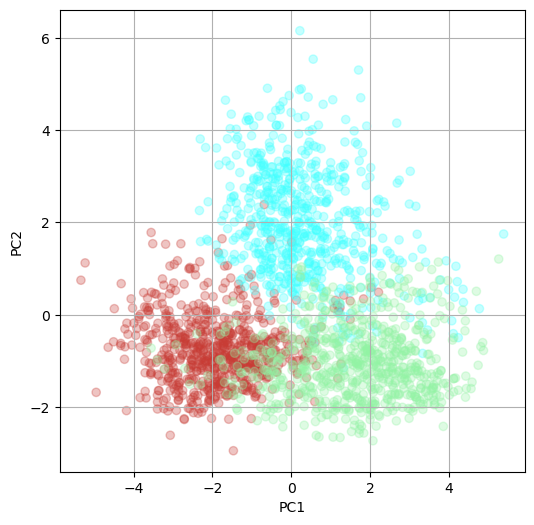

In [ ]:
import matplotlib.pyplot as plt


name_to_color = {
    "アンジュ・カトリーナ": "#C83C35",
    "リゼ・ヘルエスタ": "#42FFFF",
    "戌亥とこ": "#92F3A4"
}


color_list =  [name_to_color[name] for name in labels]

plt.figure(figsize=(6, 6))
plt.scatter(mfcc_pca[:,0], mfcc_pca[:,1] , c=color_list, alpha=0.5)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

Just using t-SNE

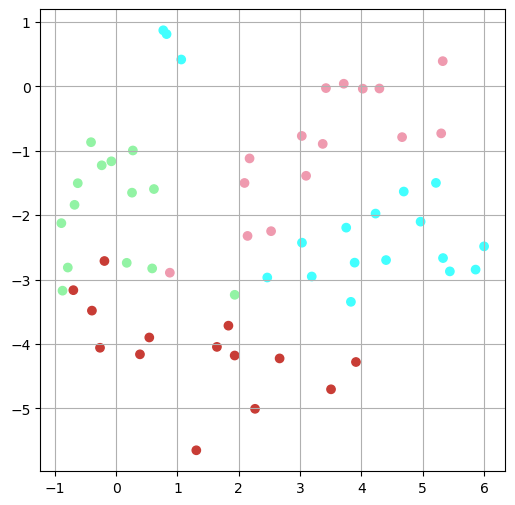

In [40]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init='random', random_state = 0)
mfcc_tsne = tsne.fit_transform(mfccs_st)

plt.figure(figsize=(6, 6))
plt.scatter(mfcc_tsne[:,0], mfcc_tsne[:,1] , c=color_list)
plt.grid()
plt.show()

Try classification with support vector machine

In [41]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

model = svm.SVC()
model.fit(mfccs_st, labels)
scores = np.mean(cross_val_score(model, mfccs_st, labels))
print(scores)

0.8871794871794872


How about for unknown data?

In [45]:
test_data = "test-voice/sasaki-lize_test.mp3"

data, _ = librosa.load(test_data, sr=sample_rate, mono=True)
total_duration = len(data) / sample_rate
num_segments = int(total_duration // segment_duration)

for i in range(num_segments):
    start_sample = int(i * segment_duration * sample_rate)
    end_sample = int((i + 1) * segment_duration * sample_rate)
    segment = data[start_sample:end_sample]

    # Compute the MFCC for the segment
    test_mfcc = np.mean(librosa.feature.mfcc(y=segment, sr=sample_rate, n_mfcc=13)[1:], axis=1)
    test_mfcc_st = scaler.transform(test_mfcc.reshape(1, -1))
    test_result = model.predict(test_mfcc_st)
    print(test_result)


['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['アンジュ・カトリーナ']
['リゼ・ヘルエスタ']
['アンジュ・カトリーナ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['アンジュ・カトリーナ']
['リゼ・ヘルエスタ']
['アンジュ・カトリーナ']
['アンジュ・カトリーナ']
['アンジュ・カトリーナ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['アンジュ・カトリーナ']
['アンジュ・カトリーナ']
['リゼ・ヘルエスタ']
['アンジュ・カトリーナ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['アンジュ・カトリーナ']
['アンジュ・カトリーナ']
['アンジュ・カトリーナ']
['リゼ・ヘルエスタ']
['アンジュ・カトリーナ']
['リゼ・ヘルエスタ']
['アンジュ・カトリーナ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['アンジュ・カトリーナ']
['アンジュ・カトリーナ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['アンジュ・カトリーナ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
['リゼ・ヘルエスタ']
